##内容检索
1. 简单绘图 --- plot函数、title函数、subplot函数
2. 绘制百度的全年股票价格 --- figure函数、add_subplot函数、一些设置x轴刻度和标签的函数
3. 绘制直方图 --- hist函数
4. 对数坐标图 --- semilogx函数等
5. 散点图 --- scatter函数
6. 着色 --- fill_between函数
7. 图例和注释 --- legend函数、annotate函数

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

##1. 简单绘图
matplotlib.pyplot包中包含了简单绘图功能。调用的相关绘图函数都会改变当前的绘图，知道我们将绘图存入文件或使用show函数显示出来。

###1.1 绘制多项式函数

In [4]:
func = np.poly1d(np.array([1, 2, 3, 4]).astype(float))
func2 = func.deriv(m=2)
x = np.linspace(-10, 10, 30)
y = func(x)
y2 = func2(x)

其中，linspace函数常见x轴的数值，在-10和10之间产生30个均匀分布的值。

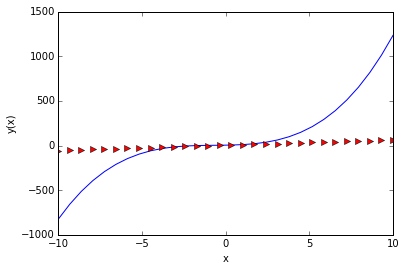

In [5]:
plt.plot(x, y)
plt.plot(x, y2, 'r>')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

plot函数可以接受任意个数的参数，我们可以使用可选的**格式字符串参数指定线条的颜色和风格**，默认为`'b-'`即蓝色视线。你可以指定其他风格。
[plot文档](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)

###1.2 绘制多项式函数及其导函数

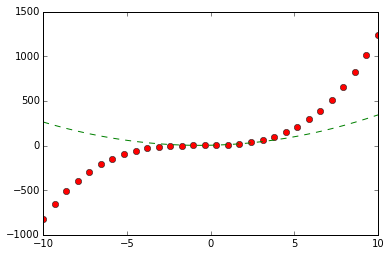

In [6]:
func1 = func.deriv(m=1)
y1 = func1(x)

plt.plot(x, y, 'ro', x, y1, 'g--')
plt.show()

###1.3 分组绘制多幅图

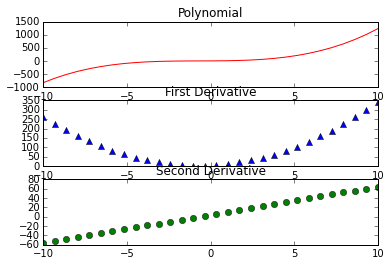

In [7]:
plt.subplot(311)
plt.plot(x, y, 'r-')
plt.title("Polynomial")

plt.subplot(312)
plt.plot(x, y1, 'b^')
plt.title("First Derivative")

plt.subplot(313)
plt.plot(x, y2, 'go')
plt.title("Second Derivative")
plt.show()

## 2. 绘制百度的全年股票价格

Matplotlib可以帮助我们监控股票投资。使用matplotlib.finance包中的函数可以从雅虎财经频道下载股价数据，并绘制K线图(candlestick)。

股市及期货市场中的K线图的画法包含四个数据，即开盘价、最高价、最低价、收盘价，所有的k线都是围绕这四个数据展开，反映大势的状况和价格信息。

In [8]:
# 将当前的日期减去1年作为起始日期
from matplotlib.dates import DateFormatter
from matplotlib.dates import DayLocator
from matplotlib.dates import MonthLocator
from matplotlib.finance import quotes_historical_yahoo_ochl
from matplotlib.finance import candlestick_ochl
import sys
from datetime import date

today = date.today()
start = (today.year - 1, today.month, today.day)

创建定位器(locator)，使用来自matplotlib.dates的对象在x轴定位月份和日期

In [9]:
alldays = DayLocator()
months = MonthLocator()

创建日期格式化器(date formatter)，以格式化x轴的日期。该格式化器创建一个字符串，包含简写的月份和年份。

In [10]:
month_formatter = DateFormatter("%b %Y")

In [11]:
# 从财经频道下载股价数据
symbol = 'BIDU' # 百度的股票代码
quotes = quotes_historical_yahoo_ochl(symbol, start, today)

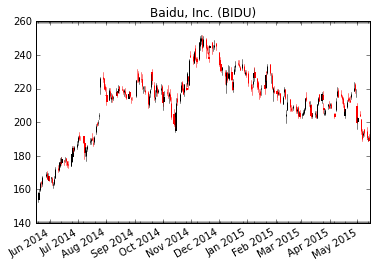

In [12]:
# 创建figure对象，这是绘图组件的顶层容器
fig = plt.figure()
# 增加一个子图
ax = fig.add_subplot(111)
# x轴上的主定位器设置为月定位器，该定位器负责x轴上较粗的刻度
ax.xaxis.set_major_locator(months)
# x轴上的次定位器设置为日定位器，该定位器负责x轴上较细的刻度
ax.xaxis.set_minor_locator(alldays)
# x轴上的主格式化器设置为月格式化器，该格式化器负责x轴上较粗刻度的标签
ax.xaxis.set_major_formatter(month_formatter)

# 使用matplotlib.finance包的candlestick函数绘制k线图
candlestick_ochl(ax, quotes)
# 将x轴上的标签格式化为日期
fig.autofmt_xdate()
plt.title('Baidu, Inc. (BIDU)')
plt.show()

##3. 绘制直方图
直方图(histogram)可以将数据的分布可视化。Matplotlib中有便捷的hist函数可以绘制直方图。

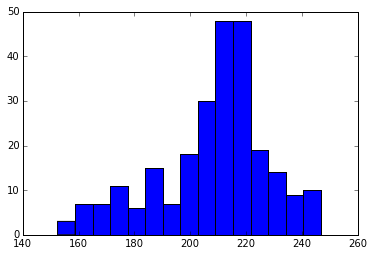

In [13]:
# 使用百度一年的股票价格数据来绘制分布直方图

# 将股价数据从python列表转化为numpy数组并提取收盘价数据
quotes = np.array(quotes)
cp = quotes.T[4]

#指定合理数量的柱形，绘制分布直方图
plt.hist(cp, np.sqrt(len(cp)))
plt.show()

##4. 对数坐标图
当数据的变化范围很大时，对数坐标图很有用。Matplotlib中又semilogx函数(对x轴取对数)、semilogy(对y轴取对数)和loglog函数(同时对x轴y轴取对数)。

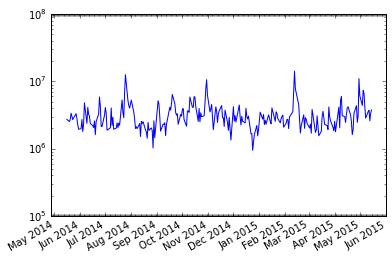

In [14]:
# 下载百度的历史数据，从中提取出日期和成交量数据
dates = quotes.T[0]
volume = quotes.T[5]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.semilogy(dates, volume)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(month_formatter)
fig.autofmt_xdate()
plt.show()

## 5. 散点图
散点图(scatter plot)用于绘制同一数据集中的两种数值变量。Matplotlib的scatter函数可以创建散点图。

*我们可以指定数据点的颜色和大小，以及图像的alpha透明度。*[scatter文档](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

接下来绘制股票收益率和成交量的散点图。

d:\Python27_32\lib\site-packages\matplotlib\collections.py:764: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


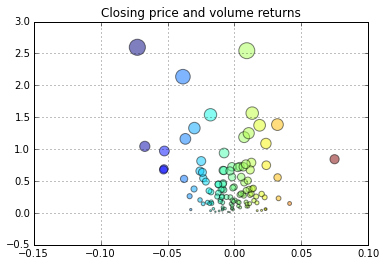

In [15]:
# 计算股票收益率和成交量的变化值
ret = np.diff(cp) / cp[:-1]
volchange = np.diff(volume) / volume[:-1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(ret, volchange, c=ret*100, s=volchange*100, alpha=0.5)
#c is color，s is size
#alpha is  between 0 (transparent) and 1 (opaque)
ax.set_title('Closing price and volume returns')
ax.grid(True)
plt.show()

##6. 着色
fill_between函数使用指定的颜色填充图像中的区域。我们也可以选择alpha通道的取值。该函数的where参数可以指定着色的条件。[fiil_between文档](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.fill_between)

下面我们要对股票曲线图进行着色，并将低于均值和高于均值的收盘价填充为不同的颜色。

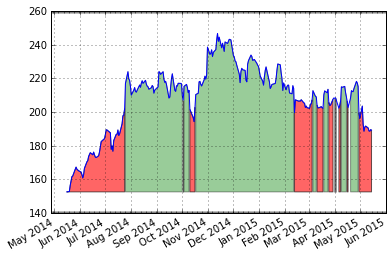

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dates, cp)

# 对收盘价下方的区域进行着色，依据低于或高于平均收盘价使用不同的颜色填充
# fill_between(x, y1, y2=0, where=None, **kwargs)
# filling the regions between y1 and y2 where where==True
plt.fill_between(dates, cp.min(), cp, where=cp>cp.mean(), facecolor="green", alpha=0.4)
plt.fill_between(dates, cp.min(), cp, where=cp<cp.mean(), facecolor="red", alpha=0.6)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(month_formatter)
plt.grid(True)
fig.autofmt_xdate()
plt.show()

##7. 图例和注释
对于高质量的绘图，图例和注释是至关重要的。我们可以用legend函数创建透明的图例，并有Matplotlib自动确定其摆放位置。同时，我们可以用annotate函数在图像上精确地添加注释，并有很多可选的注释和箭头风格。

[legend文档](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend)
[annotate文档](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate)

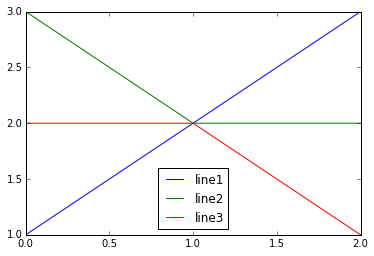

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3])
ax.plot([3, 2, 2])
ax.plot([2, 2, 1])
ax.legend(('line1','line2','line3'),loc='best')

我们就上面的收盘价例子添加图例

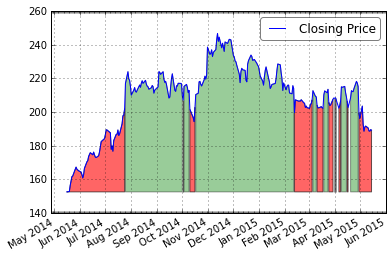

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(dates, cp)

plt.fill_between(dates, cp.min(), cp, where=cp>cp.mean(), facecolor="green", alpha=0.4)
plt.fill_between(dates, cp.min(), cp, where=cp<cp.mean(), facecolor="red", alpha=0.6)


line.set_label("Closing Price")
leg = ax.legend(loc='best', fancybox=True)
leg.get_frame().set_alpha(0.5)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(month_formatter)
plt.grid(True)
fig.autofmt_xdate()
plt.show()

**注释示例**

**s** : string

标注

**xy** : (x, y)

添加注释的位置点

**xytext** : (x, y) , optional, default: None

注释的位置

**xycoords** : string, optional, default: “data”

string that indicates what type of coordinates xy is. Examples: “figure points”, “figure pixels”, “figure fraction”, “axes points”, .... See matplotlib.text.Annotation for more details.

**textcoords** : string, optional

string that indicates what type of coordinates text is. Examples: “figure points”, “figure pixels”, “figure fraction”, “axes points”, .... See matplotlib.text.Annotation for more details. Default is None.

**arrowprops** : matplotlib.lines.Line2D properties, optional

Dictionary of line properties for the arrow that connects the annotation to the point. If the dictionnary has a key arrowstyle, a FancyArrowPatch instance is created and drawn. See matplotlib.text.Annotation for more details on valid options. Default is None.

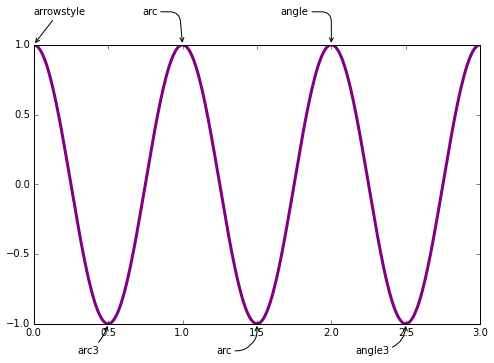

In [57]:
fig = plt.figure(1,figsize=(8,5))
ax = fig.add_subplot(111)

t = np.arange(0.0, 3.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=3, color='purple')

ax.annotate(s='arrowstyle', xy=(0, 1),  xycoords='data',
            xytext=(0, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->")
            )
ax.annotate('arc3', xy=(0.5, -1),  xycoords='data',
            xytext=(-30, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2")
            )

ax.annotate('arc', xy=(1., 1),  xycoords='data',
            xytext=(-40, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
            connectionstyle="arc,angleA=0,armA=30,rad=10"),
            )
ax.annotate('arc', xy=(1.5, -1),  xycoords='data',
                xytext=(-40, -30), textcoords='offset points',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc,angleA=0,armA=20,angleB=-90,armB=15,rad=7"),
                )

ax.annotate('angle', xy=(2., 1),  xycoords='data',
            xytext=(-50, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"),
            )

ax.annotate('angle3', xy=(2.5, -1),  xycoords='data',
            xytext=(-50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"),
            )
plt.show()